In [30]:
import torch
import torch.nn as nn
import torchvision

import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'1.10.0+cu102'

# Quick torch primer

## We can have tensors
Tensors are containers for numbers.

**single number**

In [3]:
t = torch.tensor(77)
t, t.shape

(tensor(77), torch.Size([]))

**list of numbers also known as vectors**

In [4]:
t = torch.tensor([1, 4, 10])
t, t.shape

(tensor([ 1,  4, 10]), torch.Size([3]))

**list of list of numbers a.k.a. matrix**

In [5]:
t = torch.tensor([
    [1, 2, 3],
    [5, 6, 7],
    [9, 8, 7],
])
t, t.shape

(tensor([[1, 2, 3],
         [5, 6, 7],
         [9, 8, 7]]),
 torch.Size([3, 3]))

**mind you they have to be padded to the same length**

In [6]:
try:
    torch.tensor([
        [1, 2, 3],
        [2, 3]
    ])
except ValueError:
    print('this does not work')

this does not work


**list of matrices, a.k.a. 3D tensors (image)**

In [7]:
t = torch.tensor([
    [[1, 2],
     [3, 4]],
    [[6, 9],
     [8, 8]],
    [[3, 2],
     [3, 4]]
])
t, t.shape

(tensor([[[1, 2],
          [3, 4]],
 
         [[6, 9],
          [8, 8]],
 
         [[3, 2],
          [3, 4]]]),
 torch.Size([3, 2, 2]))

**n-dim tensors**

In [8]:
# batch, of sequence of 3 channel images of size 32x32, a.k.a. 8 videos
t = torch.rand(8, 20, 3, 32, 32)
t.shape

torch.Size([8, 20, 3, 32, 32])

In [9]:
# t

## We can manipulate tensors

In [10]:
t = torch.rand(8, 20, 3, 32, 32)

**Slicing** - cutting along dimensions

In [11]:
t[:, :10, 2:, :, 10:20].shape

torch.Size([8, 10, 1, 32, 10])

In [12]:
t = torch.stack([torch.ones(2, 3), torch.zeros(2, 3)], dim=0)
t, t.shape

(tensor([[[1., 1., 1.],
          [1., 1., 1.]],
 
         [[0., 0., 0.],
          [0., 0., 0.]]]),
 torch.Size([2, 2, 3]))

In [13]:
t = torch.cat([torch.ones(2, 3), torch.zeros(2, 3)], dim=0)
t, t.shape

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 torch.Size([4, 3]))

**Arithmetic manipulations**

In [14]:
A = torch.rand(10, 20)
B = torch.rand(20, 50)
C = A @ B
C.shape

torch.Size([10, 50])

In [15]:
v = torch.rand(10, 1)
D = torch.rand(10, 10)

(v * D).shape

torch.Size([10, 10])

In [31]:
t = torch.ones(1, 5)
t

tensor([[1., 1., 1., 1., 1.]])

In [32]:
t.T * 2 + 3

tensor([[5.],
        [5.],
        [5.],
        [5.],
        [5.]])

## We can visualize tensors (with matplotlib)

In [35]:
# A

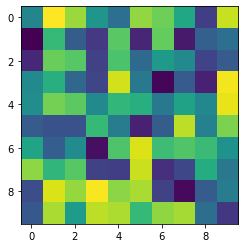

In [33]:
A = torch.rand(10, 10)
plt.imshow(A)

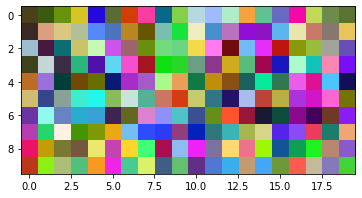

In [38]:
A = torch.rand(10, 20, 3)
plt.imshow(A)

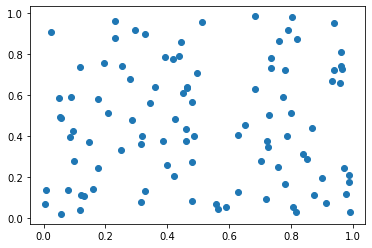

In [39]:
plt.scatter(torch.rand(100), torch.rand(100))

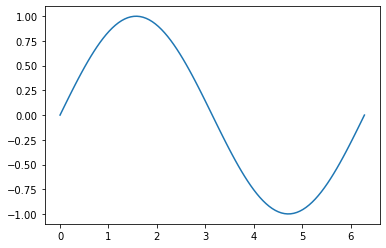

In [40]:
x = torch.linspace(0, torch.pi * 2, 100)
y = torch.sin(x)

plt.plot(x, y)

## Modules

**Classes that contain tensors as state and manipulate tensors**

In [41]:
nn.Linear

torch.nn.modules.linear.Linear

In [42]:
inp = torch.rand(10, 30) * 10
m = nn.Linear(30, 50)

out = m(inp)
out.shape

torch.Size([10, 50])

In [24]:
for p in m.parameters():
    print(p.shape)

torch.Size([50, 30])
torch.Size([50])


**We can take derivatives w.r.t. scalar outputs**

In [45]:
mean = out.mean()
mean.backward()

**We can inspect the gradients of all the variables in the computation**

In [46]:
w, b = m.parameters()

In [47]:
w.grad

tensor([[0.1001, 0.0745, 0.1133,  ..., 0.1055, 0.1011, 0.1284],
        [0.1001, 0.0745, 0.1133,  ..., 0.1055, 0.1011, 0.1284],
        [0.1001, 0.0745, 0.1133,  ..., 0.1055, 0.1011, 0.1284],
        ...,
        [0.1001, 0.0745, 0.1133,  ..., 0.1055, 0.1011, 0.1284],
        [0.1001, 0.0745, 0.1133,  ..., 0.1055, 0.1011, 0.1284],
        [0.1001, 0.0745, 0.1133,  ..., 0.1055, 0.1011, 0.1284]])

**That's kind of mostly what we need!**

In [28]:
A = torch.rand(5000, 2000).cuda()
B = torch.rand(2000, 5000).cuda()

while True:
    C = A @ B

KeyboardInterrupt: 